# 3.1.2 Implementing Linear Regression - Type 2 

In this workbook, Ill implememnt the second method - **Ordinary Least Squares**  to find the bias and weight coefficients for simple linear regression.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

I'm selcting the same variables that i picked in the previous workbook for comparison purposes.

**Petal-Length(Column 2)** and **Petal-Width(Row 3)**

In [2]:
dataset = pd.read_csv('iris.data', header=None)
X = dataset.iloc[:,[2]].values
y = dataset.iloc[:,3].values

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

I'm using the same random seed, that i used in the previous workbook.

### Ordinary Least Squares Formula

The final derived equation for Ordinary Least Squares is:

![Ordinary Least Squares Formula](linear_regression_ols.png)

where x_bar and y_bar are mean of X and y respectively.

m is the slope(Coefficient) and b is the bias(Intercept)

In [31]:
# Implemenation of OLS to find the Slope and bias.
def fit(x, y):
    n = np.size(x)
    x_mean, y_mean = np.mean(x), np.mean(y)
    m_numer = np.sum(np.dot((x-x_mean).T, (y-y_mean)))
    m_denom = np.sum(np.dot((x-x_mean).T, (x-x_mean)))
    slope = m_numer/m_denom
    bias = y_mean - slope*x_mean    
    return (slope, bias)

In [32]:
# Function to predict new datapoints
def predict(X):
    # y = m*x + b (m=slope, b=bias)
    return slope*X + bias

In [33]:
slope, bias = fit(X_train, y_train)

(112, 1) (112,)


#### Predicting and Comparing the values

In [34]:
pred = predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score,r2_score

print("Coeff: ", slope)
print("Intercept: {:.4f}".format(bias))
print("R2 Score: {:.4f}".format(r2_score(y_test, pred)))


Coeff:  0.420453237438627
Intercept: -0.3739
R2 Score: 0.8925


This is exactly the similar to the score of sklearn linear regression model.

### Visualizing the Regression Model

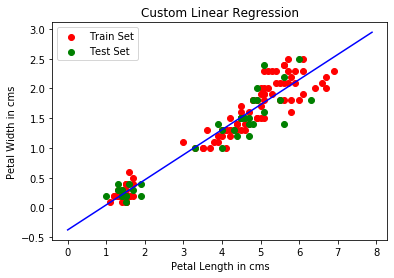

In [36]:
plt.scatter(X_train, y_train, color='red',label="Train Set")
plt.scatter(X_test, y_test, color='green',label="Test Set")
xx = np.arange(start=X.min()-1, stop=X.max()+1, step=0.01)
plt.plot(xx, predict(xx.reshape(len(xx), 1)), color='blue')
plt.xlabel("Petal Length in cms")
plt.ylabel("Petal Width in cms")
plt.title("Custom Linear Regression")
plt.legend()
plt.show()